In [2]:
import numpy as np
import matplotlib.pyplot as plt

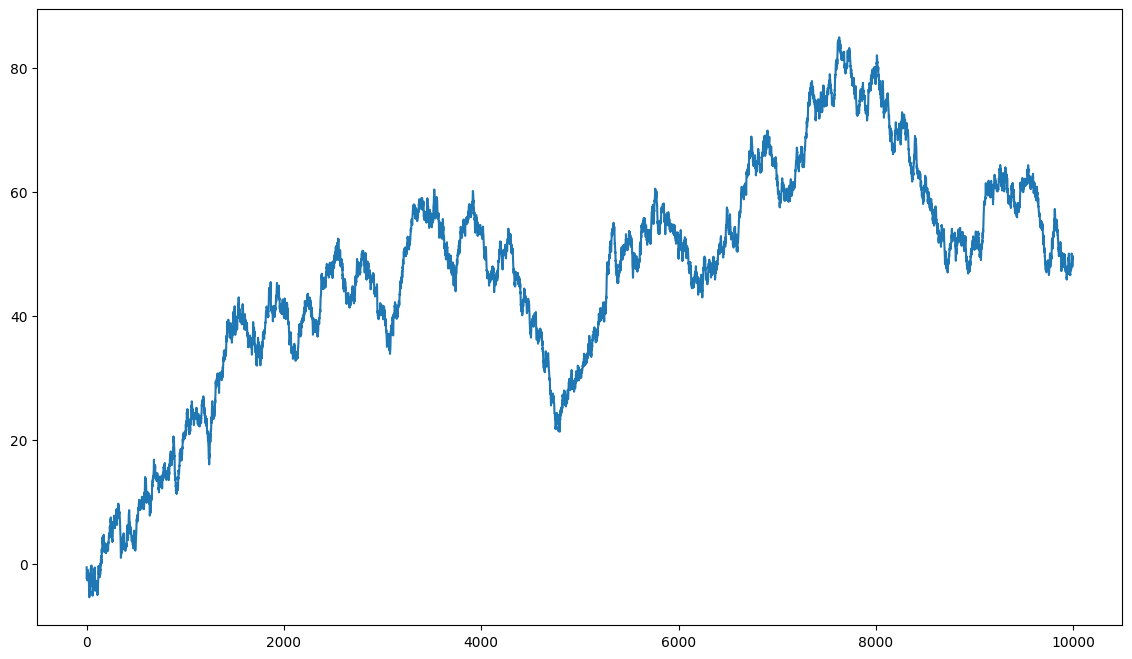

In [15]:
plt.figure(figsize=(14, 8))

mu, sigma, t = -.001, 50, 10000

dt = 1/t

r = np.random.normal(mu, sigma, t)

z = np.cumsum(r)*np.sqrt(dt)

t = np.arange(t)

s = np.exp(mu*t)*np.exp(np.sqrt(np.abs(z/2)))

plt.plot(t, z)

C:\Users\maksi\AppData\Local\Temp\ipykernel_6368\2844589171.py:47: DeprecationWarning: 'scipy.integrate.trapz' is deprecated in favour of 'scipy.integrate.trapezoid' and will be removed in SciPy 1.14.0
  g_m = m * integrate.trapz(np.squeeze(f(tGrid)),np.squeeze(tGrid))


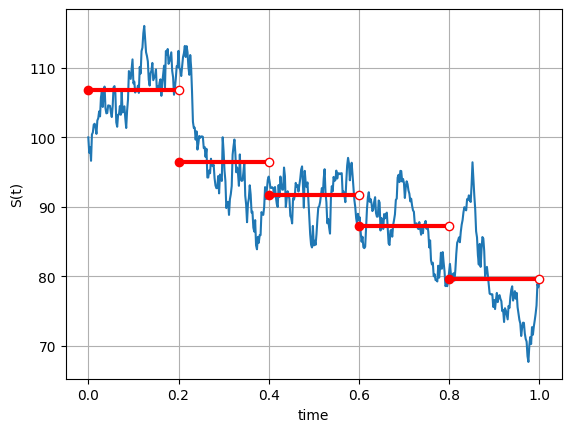

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import scipy.integrate as integrate
def GeneratePathsGBMABM(NoOfPaths,NoOfSteps,T,r,sigma,S_0):
    Z = np.random.normal(0.0,1.0,[NoOfPaths,NoOfSteps])
    X = np.zeros([NoOfPaths, NoOfSteps+1])
    time = np.zeros([NoOfSteps+1])

    X[:,0] = np.log(S_0)

    dt = T / float(NoOfSteps)
    for i in range(0,NoOfSteps):
        # Making sure that samples from a normal have mean 0 and variance 1
        if NoOfPaths > 1:
            Z[:,i] = (Z[:,i] - np.mean(Z[:,i])) / np.std(Z[:,i])
        X[:,i+1] = X[:,i] + (r - 0.5 * sigma * sigma) * dt + sigma * np.power(dt, 0.5)*Z[:,i]
        time[i+1] = time[i] +dt

# Compute exponent of ABM
    S = np.exp(X)
    paths = {"time":time,"S":S}
    return paths
def mainCalculation():
    NoOfPaths = 1
    NoOfSteps = 500
    T = 1
    r = 0.05
    sigma = 0.4
    S_0 = 100

    Paths = GeneratePathsGBMABM(NoOfPaths,NoOfSteps,T,r,sigma,S_0)
    timeGrid = Paths["time"]
    S = Paths["S"]

    plt.figure(1)
    plt.plot(timeGrid, np.transpose(S))
    plt.grid()
    plt.xlabel("time")
    plt.ylabel("S(t)")
    m = 5
    pathNumber = 0
    f = interp1d(timeGrid, S[pathNumber,:])

    for k in range(1,m*T+1):
        tGrid = np.linspace(float((k-1))/m, float(k)/m, 100)
        g_m = m * integrate.trapz(np.squeeze(f(tGrid)),np.squeeze(tGrid))
        plt.plot(tGrid,g_m * np.ones([len(tGrid),1]),'-r',linewidth=3.0)

        plt.plot(tGrid[0],g_m,'or')
        plt.plot(tGrid[-1],g_m,'or',markerfacecolor =[1,1,1])

mainCalculation()
